# Importin Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import train_test_split

# Loading The Dataset

In [46]:
def seq_data(data_f,window_length=100, time_shift=0):

    # Creates a list of 168 lists for battery_voltage
    lst_bv = [[] for _ in range(len(data_f.T))]
    # Creates a list of 168 lists for next_voltage
    lst_nv = [[] for _ in range(len(data_f.T))]
    # A list for capacity
    capacity = []

    for cycle in data_f.loc['Capacity']:
        capacity.append(cycle[0])

    for cycle_ind, cycle in enumerate(data_f.loc['voltage_battery']):
        for voltage_ind in range(len(cycle) - window_length - time_shift):

            if voltage_ind == 0:
                lst_bv[cycle_ind].append(cycle[voltage_ind: (voltage_ind + window_length)])    # 0 to 99      # 1 to 100
                lst_nv[cycle_ind].append(cycle[voltage_ind + window_length])                   # 100          # 101
            else:
                lst_bv[cycle_ind].append(cycle[voltage_ind + time_shift: (voltage_ind + window_length + time_shift)])    # 2 to 101
                lst_nv[cycle_ind].append(cycle[voltage_ind + window_length + time_shift])                                # 102

    # Nested List Comprehension for flattening lst_bv and lst_nv
    __lst_bv = [vol for sub_l in lst_bv for vol in sub_l]
    __lst_nv = [n_vol for sub_l in lst_nv for n_vol in sub_l]

    battery_voltage = np.array(__lst_bv)
    next_value = np.array(__lst_nv)
    capacity = np.array(capacity)

    battery_voltage = battery_voltage[...,np.newaxis]
    next_value = next_value[...,np.newaxis]
    capacity = capacity[...,np.newaxis]
    # print(battery_voltage.shape)
    # print(next_value.shape)
    # print(capacity.shape)

    return battery_voltage, next_value, capacity

In [48]:
data_f = pd.read_json('./assets/Nasa_LiB_B5_discharge.json')
window_length = 100
battery_voltage, next_value, capacity = seq_data(data_f,window_length=window_length, time_shift=0)
window_length = 1
print(battery_voltage.shape)
print(next_value.shape)
print(capacity.shape)

(33485, 100, 1)
(33485, 1)
(168, 1)


In [4]:
train_seq, test_seq, y_train, y_test = train_test_split(battery_voltage, next_value, test_size=0.25)

In [5]:
train_seq = train_seq[...,np.newaxis]
# train_seq = train_seq[:,np.newaxis]
y_train = y_train[...,np.newaxis]

In [43]:
data_f.T

,amb_temp,date_time,voltage_battery,current_battery,temp_battery,current_load,voltage_load,time,Capacity
1,24,"02 Apr 2008, 15:25:41","[4.191491807505295, 4.190749067776103, 3.97487...","[-0.004901589207462, -0.0014780055516420002, -...","[24.330033885570543, 24.325993424022467, 24.38...","[-0.0006000000000000001, -0.000600000000000000...","[0.0, 4.206, 3.062, 3.03, 3.011, 2.991, 2.977,...","[0.0, 16.781, 35.702999999999996, 53.781, 71.9...",[1.8564874208181572]
3,24,"02 Apr 2008, 19:43:48","[4.189773213846608, 4.188881380279099, 3.97915...","[2.1251179810807652e-05, -0.00087947126634, -2...","[24.697751935729325, 24.685948163596, 24.73813...","[-0.0006000000000000001, -0.000600000000000000...","[0.0, 4.204, 3.056, 3.024, 3.003, 2.983, 2.973...","[0.0, 16.672, 35.703, 53.828, 71.891, 90.047, ...",[1.846327249719927]
5,24,"03 Apr 2008, 00:01:06","[4.188186735991303, 4.187198338393574, 3.97999...","[-0.0017540301662320001, -0.001791647748693000...","[24.734266163954402, 24.74050014862512, 24.791...","[-0.0006000000000000001, -0.000600000000000000...","[0.0, 4.203, 3.055, 3.023, 3.0, 2.981, 2.96999...","[0.0, 16.796999999999997, 35.766, 53.891, 72.0...",[1.835349194223407]
7,24,"03 Apr 2008, 04:16:37","[4.188461118855572, 4.187752210174129, 3.98161...","[-0.002775036129446, 0.00023371270769300003, -...","[24.65423646922845, 24.652243741292516, 24.697...","[-0.0006000000000000001, -0.000600000000000000...","[0.0, 4.203, 3.055, 3.023, 2.999, 2.982, 2.969...","[0.0, 16.766000000000002, 35.75, 53.813, 72.04...",[1.835262527582112]
9,24,"03 Apr 2008, 08:33:25","[4.188298524761055, 4.187384730878918, 3.98225...","[-0.007980866803888001, 0.0017014548245030002,...","[24.524796959348127, 24.518700434435164, 24.57...","[-0.0006000000000000001, -0.000600000000000000...","[0.0, 4.203, 3.056, 3.025, 3.0, 2.984, 2.973, ...","[0.0, 16.719, 35.656000000000006, 53.859, 72.0...",[1.834645508212041]
...,...,...,...,...,...,...,...,...,...
599,24,"26 May 2008, 10:44:38","[4.196640912532072, 4.195891409328115, 3.97041...","[-0.0031723450500130003, -0.001165548113920000...","[23.741424141669572, 23.73611267134457, 23.762...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.211, 2.944, 2.931, 2.92, 2.906, 2.894,...","[0.0, 9.343, 19.483999999999998, 28.7650000000...",[1.293463613844243]
603,24,"26 May 2008, 15:30:43","[4.195623574912322, 4.195225391012888, 3.96944...","[-0.005227006197317001, -0.0018109194843490002...","[23.80397851847974, 23.80026564355092, 23.8387...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.211, 2.926, 2.93, 2.916, 2.902, 2.8890...","[0.0, 9.359000000000002, 19.562000000000005, 2...",[1.288003392619118]
607,24,"26 May 2008, 20:21:04","[4.195862008850563, 4.195180368506587, 3.96948...","[-0.0005545264293170001, 0.001394789927994, -2...","[23.849121770252687, 23.85032548167981, 23.872...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.211, 2.939, 2.9290000000000003, 2.916,...","[0.0, 9.313000000000002, 19.469, 28.797, 38.14...",[1.28745252213794]
611,24,"27 May 2008, 15:52:41","[4.18482689434833, 4.184358228897457, 3.964730...","[-0.0038126960802460003, -0.003553288376752, -...","[24.93410482186201, 24.92195746617458, 24.9390...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.2, 2.977, 2.947, 2.931, 2.917, 2.90500...","[0.0, 9.375, 19.593999999999998, 28.9839999999...",[1.309015364230735]


# Voltage versus Time plot

Text(0.5, 1.0, 'Voltage vs Time')

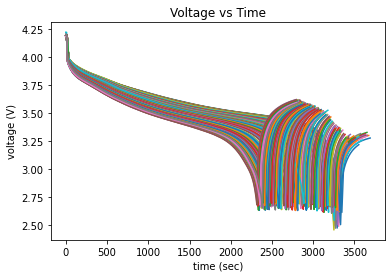

In [7]:
for i in data_f:
    plt.plot(data_f[i].loc['time'], data_f[i].loc['voltage_battery'])
    
plt.xlabel("time (sec)")
plt.ylabel("voltage (V)")
plt.title("Voltage vs Time")

# Model

In [8]:
def get_model_SimpleRNN(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = keras.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=input_shape),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(window_length))
    ])

    return model

def get_model_GRU(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = keras.Sequential([
        keras.layers.GRU(20, return_sequences=True, input_shape=input_shape),
        keras.layers.GRU(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(window_length))
    ])

    return model

def get_model_LSTM(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = keras.Sequential([
        keras.layers.LSTM(20, return_sequences=True, input_shape=input_shape),
        keras.layers.LSTM(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(window_length))
    ])

    return model

In [9]:
rnn_model_SimpleRNN = get_model_SimpleRNN([None, 1])
rnn_model_GRU = get_model_GRU([None, 1])
rnn_model_LSTM = get_model_LSTM([None, 1])

In [10]:
print("SimpleRNN:")
rnn_model_SimpleRNN.summary()
print("\nGRU:")
rnn_model_GRU.summary()
print("\nLSTM:")
rnn_model_LSTM.summary()

SimpleRNN:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed (TimeDistr  (None, None, 1)          21        
 ibuted)                                                         
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________

GRU:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 20)          1380      
               

In [11]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
#     model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
    
    return model

In [12]:
simpleRNN_model = compile_model(rnn_model_SimpleRNN)
GRU_model = compile_model(rnn_model_GRU)
LSTM_model = compile_model(rnn_model_LSTM)

# Training

## SimpleRNN

In [13]:
def train_model(model, train_seq, train_labels, epochs):
    return model.fit(train_seq, train_labels, epochs=epochs)

In [14]:
print(train_seq.shape)
history = train_model(simpleRNN_model, train_seq, y_train, 5)

(25113, 100, 1, 1)
Epoch 1/5
785/785 [==============================] - 13s 15ms/step - loss: 0.3007 - mean_squared_error: 0.3007 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 6.9818 - cosine_proximity: 0.9890
Epoch 2/5
785/785 [==============================] - 12s 15ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 3.4270 - cosine_proximity: 1.0000
Epoch 3/5
785/785 [==============================] - 11s 15ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 3.1581 - cosine_proximity: 1.0000
Epoch 4/5
785/785 [==============================] - 11s 14ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 2.9420 - cosine_proximity: 1.0000
Epoch 5/5
785/785 [==============================] - 11s 15ms/step - loss: 0.0201 - mean_squared_error: 0.0201 - mean_absolute_error: 0.0925 - me

In [15]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

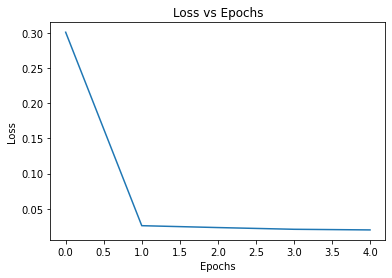

In [16]:
acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

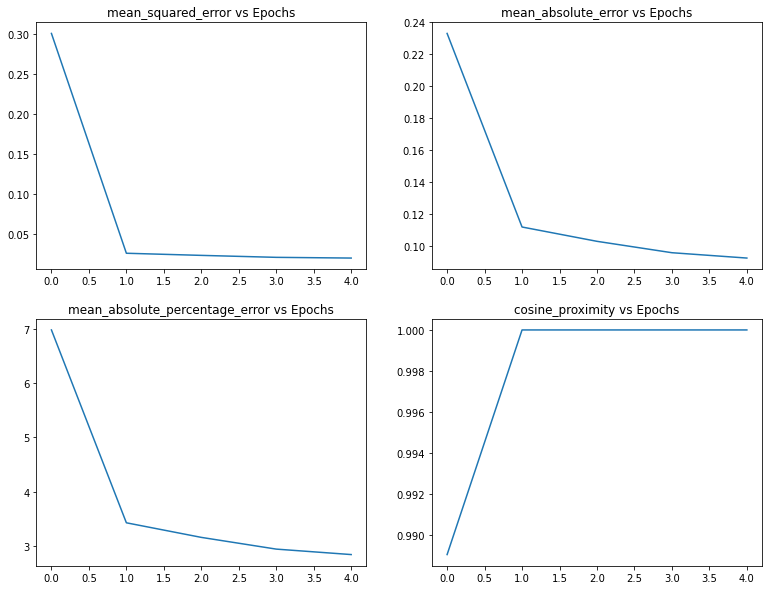

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
plt.subplot(221)
plt.plot(history.history['mean_squared_error'])
plt.gca().set_title('mean_squared_error vs Epochs')

plt.subplot(222)
plt.plot(history.history['mean_absolute_error'])
plt.gca().set_title('mean_absolute_error vs Epochs')

plt.subplot(223)
plt.plot(history.history['mean_absolute_percentage_error'])
plt.gca().set_title('mean_absolute_percentage_error vs Epochs')

plt.subplot(224)
plt.plot(history.history['cosine_proximity'])
plt.gca().set_title('cosine_proximity vs Epochs')

plt.show()

### Model Evauation

In [18]:
def evaluate_model(model, test_seq, y_test):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(test_seq, y_test)

In [19]:
print(test_seq.shape)
print(y_test.shape)
print(y_train.shape)
print(train_seq.shape)
evaluate_model(simpleRNN_model, test_seq, y_test)

(8372, 100, 1)
(8372, 1)
(25113, 1, 1)
(25113, 100, 1, 1)
262/262 [==============================] - 1s 4ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 2.5288 - cosine_proximity: 9.9996


[0.017665984109044075,
 0.017665984109044075,
 0.08220363408327103,
 2.5287740230560303,
 9.99956226348877]

## GRU

In [20]:
print(train_seq.shape)
history = train_model(GRU_model, train_seq, y_train, 5)

(25113, 100, 1, 1)
Epoch 1/5
785/785 [==============================] - 30s 35ms/step - loss: 0.1802 - mean_squared_error: 0.1802 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 5.8621 - cosine_proximity: 1.0000
Epoch 2/5
785/785 [==============================] - 28s 35ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 3.5794 - cosine_proximity: 1.0000
Epoch 3/5
785/785 [==============================] - 29s 37ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 3.3439 - cosine_proximity: 1.0000
Epoch 4/5
785/785 [==============================] - 27s 35ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 3.1451 - cosine_proximity: 1.0000
Epoch 5/5
785/785 [==============================] - 27s 34ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - mean_absolute_error: 0.1002 - me

In [21]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

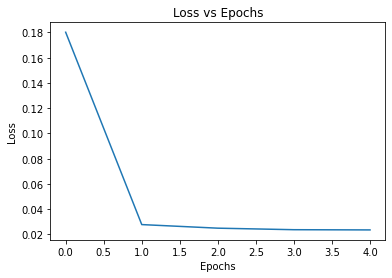

In [22]:
acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

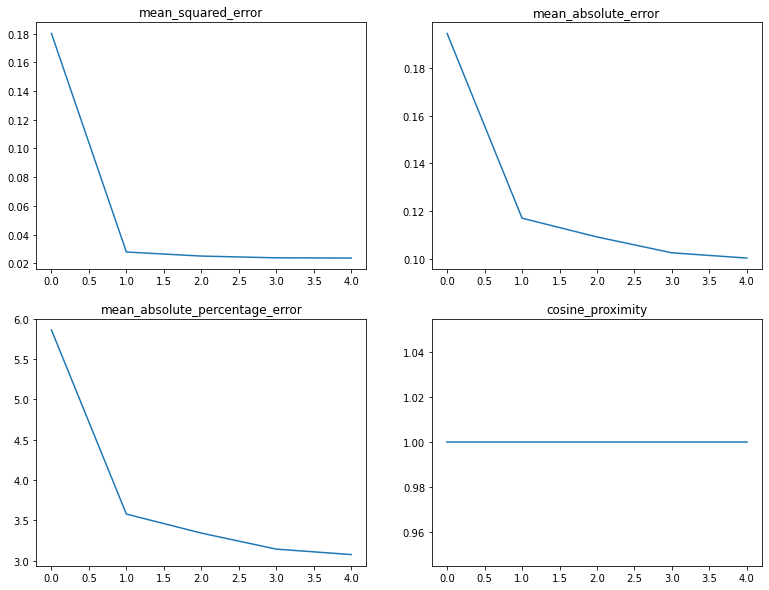

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
plt.subplot(221)
plt.plot(history.history['mean_squared_error'])
plt.gca().set_title('mean_squared_error')

plt.subplot(222)
plt.plot(history.history['mean_absolute_error'])
plt.gca().set_title('mean_absolute_error')

plt.subplot(223)
plt.plot(history.history['mean_absolute_percentage_error'])
plt.gca().set_title('mean_absolute_percentage_error')

plt.subplot(224)
plt.plot(history.history['cosine_proximity'])
plt.gca().set_title('cosine_proximity')

plt.show()

### Model Evauation

In [24]:
def evaluate_model(model, test_seq, y_test):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(test_seq, y_test)

In [25]:
evaluate_model(GRU_model, test_seq, y_test)

262/262 [==============================] - 3s 8ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 2.9254 - cosine_proximity: 9.9993


[0.021896690130233765,
 0.021896690130233765,
 0.09531611204147339,
 2.9253599643707275,
 9.999288558959961]

## LSTM

In [26]:
print(train_seq.shape)
history = train_model(LSTM_model, train_seq, y_train, 5)

(25113, 100, 1, 1)
Epoch 1/5
785/785 [==============================] - 28s 32ms/step - loss: 0.3076 - mean_squared_error: 0.3076 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 7.3238 - cosine_proximity: 1.0000
Epoch 2/5
785/785 [==============================] - 25s 31ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 3.6285 - cosine_proximity: 1.0000
Epoch 3/5
785/785 [==============================] - 25s 32ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 2.9578 - cosine_proximity: 1.0000
Epoch 4/5
785/785 [==============================] - 26s 33ms/step - loss: 0.0187 - mean_squared_error: 0.0187 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 2.6317 - cosine_proximity: 1.0000
Epoch 5/5
785/785 [==============================] - 25s 31ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - mean_absolute_error: 0.0794 - me

In [27]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

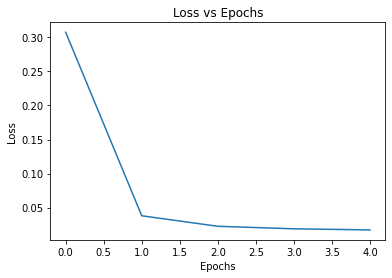

In [28]:
acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

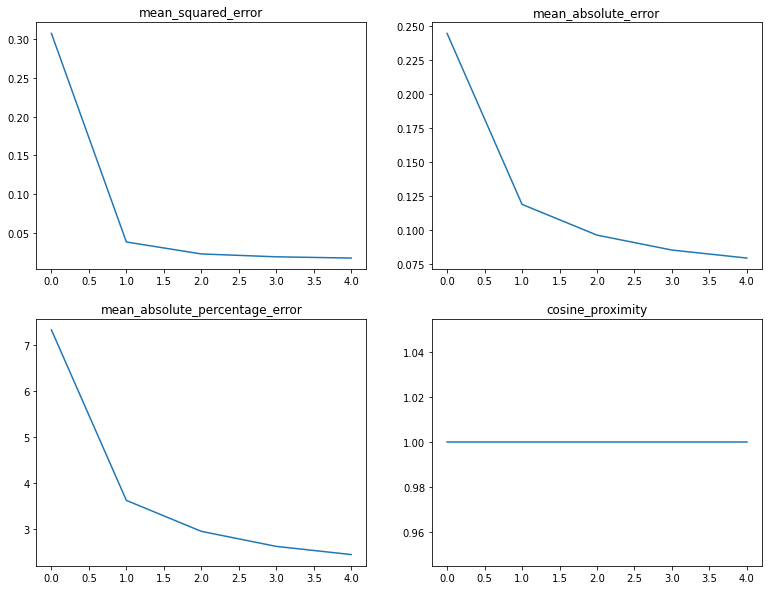

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
plt.subplot(221)
plt.plot(history.history['mean_squared_error'])
plt.gca().set_title('mean_squared_error')

plt.subplot(222)
plt.plot(history.history['mean_absolute_error'])
plt.gca().set_title('mean_absolute_error')

plt.subplot(223)
plt.plot(history.history['mean_absolute_percentage_error'])
plt.gca().set_title('mean_absolute_percentage_error')

plt.subplot(224)
plt.plot(history.history['cosine_proximity'])
plt.gca().set_title('cosine_proximity')

plt.show()

### Model Evauation

In [30]:
def evaluate_model(model, test_seq, y_test):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(test_seq, y_test)

In [31]:
evaluate_model(LSTM_model, test_seq, y_test)

262/262 [==============================] - 3s 10ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 2.7027 - cosine_proximity: 9.9990


[0.016412008553743362,
 0.016412008553743362,
 0.08921146392822266,
 2.702662706375122,
 9.998992919921875]

# Estimating The Capacity

## Using RNN

In [32]:
lst_flag = []
for i in data_f.loc["voltage_battery"]:
    lst_flag.append(len(i))
min_num_voltage = min(lst_flag)

voltage = [v for v in data_f.loc["voltage_battery"]]
voltage = [voltage[i][:min_num_voltage] for i in range(len(voltage))]
voltage = np.array(voltage)
capacity = np.array(capacity)
print(voltage.shape)
print(capacity.shape)
print(type(voltage))
print(type(capacity))

(168, 179)
(168, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
voltage = voltage[...,np.newaxis]

print(voltage.shape)
print(capacity.shape)

(168, 179, 1)
(168, 1)


In [34]:
train_seq_cap, test_seq_cap, y_train_cap, y_test_cap = train_test_split(voltage, capacity, test_size=0.25)

In [35]:
model_cap = keras.Sequential([
    keras.layers.LSTM(50, activation="tanh", return_sequences=False, input_shape=(min_num_voltage,1)),
    keras.layers.Dense(1)
])

Epoch 1/50
4/4 [==============================] - 2s 35ms/step - loss: 1.0673 - mean_squared_error: 1.0673 - mean_absolute_error: 0.9954 - mean_absolute_percentage_error: 62.1190 - cosine_proximity: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 35ms/step - loss: 0.1858 - mean_squared_error: 0.1858 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 21.4886 - cosine_proximity: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0936 - mean_squared_error: 0.0936 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 17.3401 - cosine_proximity: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 34ms/step - loss: 0.1718 - mean_squared_error: 0.1718 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 24.5643 - cosine_proximity: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 34ms/step - loss: 0.0854 - mean_squared_error: 0.0854 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 16.57

4/4 [==============================] - 0s 32ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 11.5838 - cosine_proximity: 1.0000
Epoch 41/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 11.5404 - cosine_proximity: 1.0000
Epoch 42/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 11.4828 - cosine_proximity: 1.0000
Epoch 43/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 11.5974 - cosine_proximity: 1.0000
Epoch 44/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 11.5130 - co

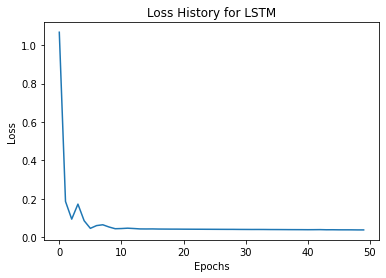

2/2 [==============================] - 0s 10ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 10.5241 - cosine_proximity: 1.0000


[0.031532417982816696,
 0.031532417982816696,
 0.1558409184217453,
 10.52409839630127,
 1.0]

In [36]:
model_cap = compile_model(model_cap)
history_cap = train_model(model_cap, train_seq_cap, y_train_cap, 50)

frame = pd.DataFrame(history_cap.history)
acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss", title="Loss History for LSTM")
plt.show()

evaluate_model(model_cap, test_seq_cap, y_test_cap)

6/6 [==============================] - 0s 12ms/step


Text(0.5, 1.0, 'Estimation of SOH Using LSTM')

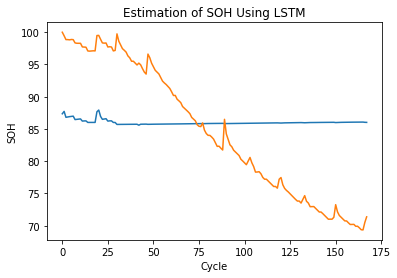

In [38]:
# Estimation of SOH
predicted_cap = model_cap.predict(voltage)
initial_cap = capacity[0]
SOH_pred = predicted_cap / initial_cap * 100
SOH_real = capacity / initial_cap * 100
plt.plot(SOH_pred)
plt.plot(SOH_real)
plt.xlabel("Cycle")
plt.ylabel("SOH")
plt.title("Estimation of SOH Using LSTM")

## Using MLP

In [39]:
model_MLP = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(min_num_voltage,)),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(128,activation="relu"),
#     keras.layers.Dense(1, activation="softmax")
    keras.layers.Dense(1)
    
])

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5672 - mean_squared_error: 0.5672 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 42.7059 - cosine_proximity: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1137 - mean_squared_error: 0.1137 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 17.2504 - cosine_proximity: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.1249 - mean_squared_error: 0.1249 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 17.7468 - cosine_proximity: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0659 - mean_squared_error: 0.0659 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 14.5098 - cosine_proximity: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0526 - mean_squared_error: 0.0526 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 12.7725 - 

4/4 [==============================] - 0s 2ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 10.1766 - cosine_proximity: 1.0000
Epoch 41/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 10.3929 - cosine_proximity: 1.0000
Epoch 42/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 10.5014 - cosine_proximity: 1.0000
Epoch 43/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 10.1208 - cosine_proximity: 1.0000
Epoch 44/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0432 - mean_squared_error: 0.0432 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 11.1469 - cosine_

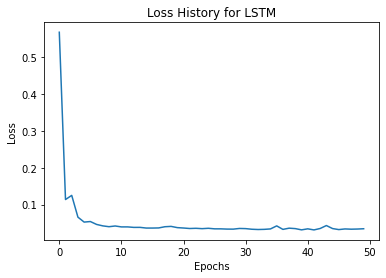

2/2 [==============================] - 0s 11ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 10.5241 - cosine_proximity: 1.0000


[0.031532417982816696,
 0.031532417982816696,
 0.1558409184217453,
 10.52409839630127,
 1.0]

In [40]:
model_cap_MLP = compile_model(model_MLP)
history_cap = train_model(model_MLP, train_seq_cap, y_train_cap, 50)
frame = pd.DataFrame(history_cap.history)
acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss", title="Loss History for LSTM")
plt.show()
evaluate_model(model_cap, test_seq_cap, y_test_cap)

6/6 [==============================] - 0s 1ms/step


(168, 1)

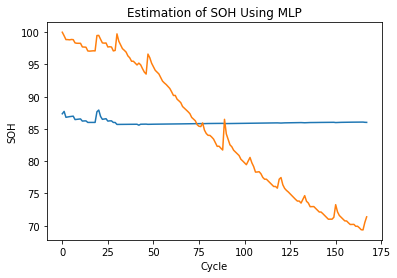

In [42]:
# Estimation of SOH
predicted_cap_MLP = model_cap_MLP.predict(voltage)
initial_cap_MLP = capacity[0]
SOH_pred_MLP = predicted_cap / initial_cap * 100
SOH_real_MLP = capacity / initial_cap * 100
plt.plot(SOH_pred)
plt.plot(SOH_real)
plt.xlabel("Cycle")
plt.ylabel("SOH")
plt.title("Estimation of SOH Using MLP")


SOH_pred.shape
# SOH_real.shape